<a href="https://ibb.co/xMr3mZc"><img src="https://i.ibb.co/qR2x064/Wind-turbine.jpg" alt="Wind-turbine" border="0"></a>
# Abstract

Wind power curves play important roles in wind power forecasting, wind turbine condition monitoring, estimation of wind energy potential and wind turbine selection. In practice, it is a challenging task to produce reliable wind power curves from raw wind data due to the presence of outliers formed in unexpected conditions, e.g., wind curtailment and blade damage. This Notebook tried to approaching a model for power curve modeling. Moreover, the performances of different ML models are studied in different seasons. 

In general, there are three factors that affect the final wind power curves: data filtering approaches; wind power curve models; and choice of optimization strategies. However, there is no guarantee that all outliers will be removed from the raw wind data. Consequently, designing robust regression models or constructing robust objective functions may be two effective ways to obtain accurate power curves in the presence of outliers.


# Introduction

Wind energy is clean, inexhaustible, inexpensive and widely distributed [1]. However, the randomness and intermittency of wind lead to uncertainty in wind power generation, which brings challenges to the corresponding energy management system and affects the reliability of the entire power grid. Therefore, accurate estimates of wind power curves,which show the non-linear relationship between wind speed and wind power, are required for effective integration of wind power into the power system, as well as wind turbine condition monitoring projects.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/DDNt5tD/A-typical-wind-power-curve.png" alt="A-typical-wind-power-curve" border="0"></a>

A typical wind power curve is shown in above. Each wind turbine manufacturer provides an ideal energy production curve for their turbines. Here is a brief overview about what it means:

+ The power curve of a wind turbine presents the electrical power output ratings of the machine for different wind speeds. 
+ A typical wind turbine power curve has three main characteristic speeds: 
1) cut-in (Vc ); 
2) rated (Vr ); and 
3) cut-out (Vs) speeds. 

The turbine starts generating power when the wind speed reaches the cut-in value. The rated speed is the wind speed at which the generator is producing the machine’s rated power. When the wind speed reaches the cut-out speed, the power generation is shut down to prevent defects and damages. Theoretical power curves are supplied by manufacturers assuming ideal meteorological and topographical conditions. 

In practice, however, wind turbines are never used under ideal conditions, and the empirical power curves could be substantially different from the theoretical ones due to the location of the turbine, air density, wind velocity distribution, wind direction, mechanical and control issues, as well as uncertainties in measurements.
(Source: http://ieeexplore.ieee.org/iel7/5165391/5433168/06894235.pdf )

# Roles of wind power curve modeling

Wind power curves mainly contribute to wind power forecasting wind turbine condition monitoring, estimation of potential wind energy and wind turbine selection.

<a href="https://ibb.co/BghRmvZ"><img src="https://i.ibb.co/khLFpz8/The-roles-of-wind-power-curve-in-wind-power-forecasting.jpg" alt="The-roles-of-wind-power-curve-in-wind-power-forecasting" border="0"></a>

+ Wind power forecasting

Accurate prediction of wind power is critical to increasing the utilization of wind in the electricity grid. It also helps power system operators to plan unit commitment, economic scheduling, and dispatch. In general, an accurate power curve is conducive to wind power prediction. So, a suitable power curve results in more accurate power forecasts. 

+ Wind energy potential estimation and wind turbine selection

Wind energy potential is an important factor in identifying potential areas that might be suitable for wind energy development. Accurate estimation of wind energy potential is not only an essential part of wind energy development and utilization, but also provides investors with the necessary confidence in financial feasibility and risk mitigation.

+ Wind turbine condition monitoring

The wind power curve characterizes wind turbine generation under normal conditions, so it can be used as an online wind turbine power generation profile. This can help us understand whether a wind turbine works under normal conditions, and then allowing for troubleshooting and scheduling maintenance, as well as repair interventions when the turbine is faulty. Understanding potential failures will help maintain and improve the operational efficiency and reliability of wind energy conversion systems.

# Data description

In Wind Turbines, Scada Systems measure and save data's like wind speed, wind direction, generated power etc. for 10 minutes intervals. This file was taken from a wind turbine's scada system that is working and generating power in Turkey.

The data's in the file are:

+ Date/Time (for 10 minutes intervals)
+ LV ActivePower (kW): The power generated by the turbine for that moment
+ Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
+ TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer, and
+ Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-turbine-scada-dataset/T1.csv


In [2]:
data = pd.read_csv('../input/wind-turbine-scada-dataset/T1.csv',parse_dates=["Date/Time"])
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Data preprocessing

A number of techniques have been proposed to obtain accurate wind power curves, often in two steps: 

+ Data preprocessing, and
+ Power curve modeling.

Data preprocessing is used to filter wind data when the turbine runs under abnormal conditions, such as wind curtailment and
blade damage, thus alleviating the adverse effects of these outliers on the training phases of the power curve model. However, it cannot be guaranteed that different types of outliers will be detected and processed during the data preprocessing phase. Therefore, some hidden anomalies will still be present in the data. Consequently, the error distribution in the wind power curve modeling data will be asymmetric. At present, it can be concluded from the review of wind power curve modeling techniques
that few models have considered this problem adequately. In this Notebook, based on the analysis of asymmetric error distribution, a simple strategy for improving the accuracy of wind power curve models are proposed.

Currently, preprocessing approaches for the raw wind data can be divided into three groups: man-made approaches, statistic-based models and learning-based models. Based on the characteristics of the raw wind data, the man-made approaches usually define the abnormal samples by the authors themselves. Schlechtingen and Santos proposed a four-step wind data preprocessing method:

+ validity check, 
+ data scaling, 
+ missing data preprocessing, and 
+ lag removal. 

Wang et al. defined a simple interval-based detection method to help remove some obvious outliers directly based on the plot
of wind speed and wind power.

In this Notebook, a two-step method to refine the raw power data was used. 
+ First, wind speed data were divided into many small independent intervals, in which outlier data was checked, detected and removed.
+ Then, the wind power data were further refined according to a histogram with ten bins. 

There are several authors have suggested differernt approaches to process the data, and it can be concluded that the man-made approaches and the statisticbased models seem to be simpler than the learning-based models. Noted that, the results of the man-made approaches depend largely on their own definition of outliers.  Therefore, before constructing a statistic-based model or a learning-based model to preprocess raw wind data, it is better to first take the man-made approaches to preprocess them.

Although multiple data preprocessing methods are employed to process raw wind date, we cannot guarantee that all abnormal points are detected and processed, and there are still many abnormal samples in our processed data. This fact has been illustrated in several publications. Although most of outliers are eliminated, the preprocessed data also have an impact on power curve modeling. There are still several challenges to achieve relatively accurate power curves.

In [4]:
data.shape

(50530, 5)

In [5]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

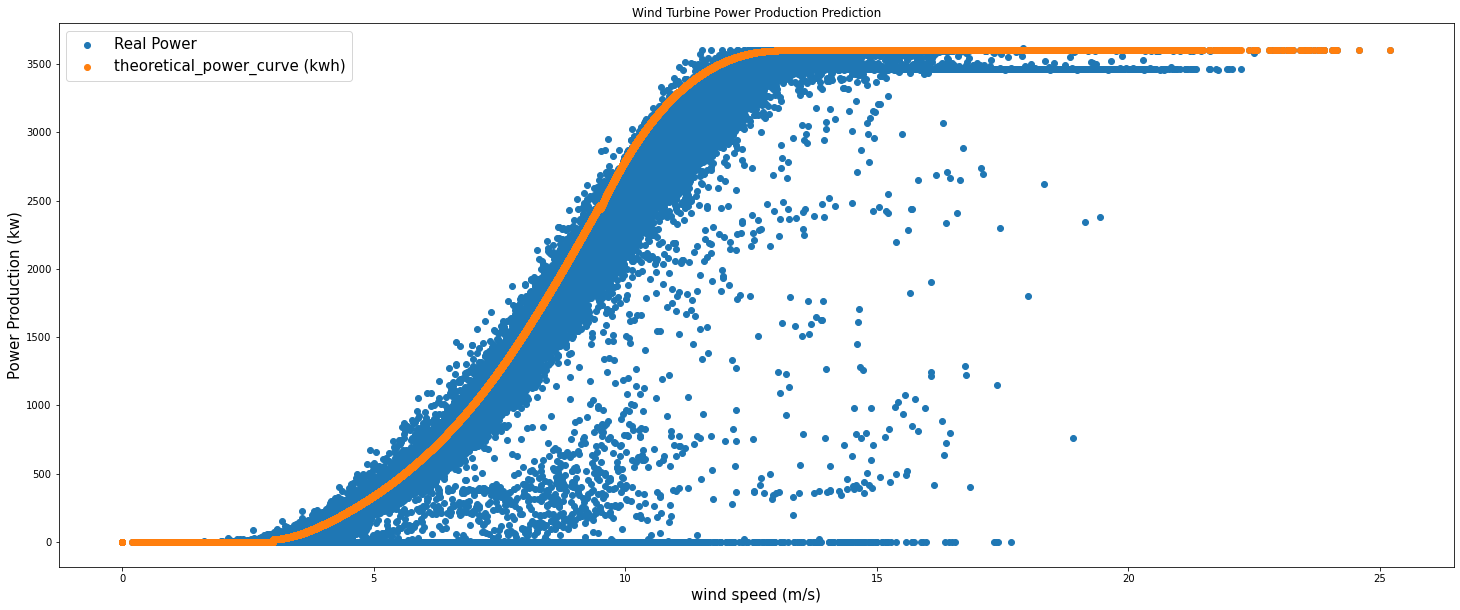

In [7]:
data = data
def plot1(data):
    exp = data['LV ActivePower (kW)']
    the = data['Theoretical_Power_Curve (KWh)']
    plt.figure(figsize=(25,10)) 
    plt.scatter(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'],label='Real Power')
    plt.scatter(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'],label='theoretical_power_curve (kwh)')
    plt.xlabel('wind speed (m/s)', size=15)
    plt.ylabel('Power Production (kw)', size=15)
    plt.title('Wind Turbine Power Production Prediction')
    plt.legend(fontsize=15)
    plt.show()
plot1(data)

In [8]:
def plot2(data):
    exp = data['LV ActivePower (kW)']
    the = data['Theoretical_Power_Curve (KWh)']
    plt.figure(figsize=(25,10)) 
    plt.scatter(data['Wind Direction (°)'], data['LV ActivePower (kW)'],label='Real Power')
    plt.scatter(data['Wind Direction (°)'], data['Theoretical_Power_Curve (KWh)'],label='theoretical_power_curve (kwh)')
    plt.xlabel('Wind Direction (°)', size=15)
    plt.ylabel('Power Production (kw)', size=15)
    plt.title('Wind Turbine Power Production Prediction on Wind Direction (°)')
    plt.legend(fontsize=15)
    plt.show()

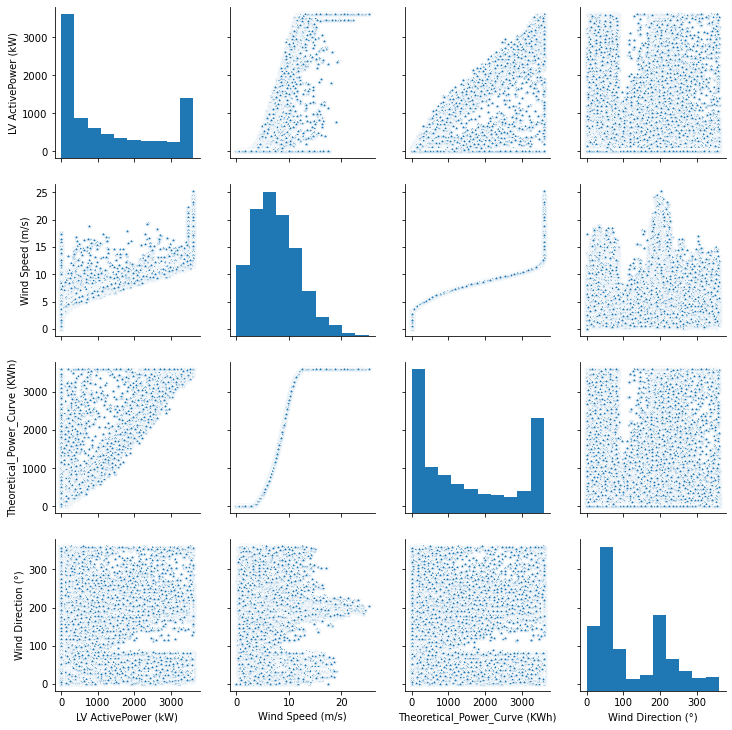

In [9]:
import seaborn as sns
sns.pairplot(data, markers='*')

# Error characteristics of power curve modeling

Generally, normal wind data can be described by a power curve. However, in the open environment, due to complex geographical factors and changeable weather, as well as the characteristics of the wind turbine itself, there are many outliers, which are far from the corresponding ideal wind power in our power data. In order to demonstrate the error characteristics of power curve modeling, we analyze three kinds of representative outliers.

The first type of outlier is that the value of wind power tends to zero when the corresponding wind speed is greater than the cut-in wind speed but less than the cut-out wind speed. Wind turbine maintenance and wind curtailment may result in such outliers. 

The second type of outlier is similar to the first type of outlier, they are also far from their ideal power data on the power curve, but do not equal to zero. The reasons for such outliers may be wind curtailment and dirt, bugs, or ice on blades, pitch malfunction and other factors. 

The final type of outlier is that the value of wind power exceeds the physical limitation of the wind turbine.

It can be seen that most outliers are identified and removed from the raw wind data. After filtering those outliers, the refined wind data are employed to train the power curve models.

A wind turbine power curve essentially captures the performance of the wind turbine. The power curve depicts the relationship between the wind speed and output power of the turbine. Modeling of wind turbine power curve aids in performance monitoring of the turbine and also in forecasting of power.

# Regression model. 

Different kinds of regression models have been used to obtain accurate power curves. Two popular machine learning methods, support vector machine (SVM) and GP, have been widely used in power curve modeling due to their superior nonlinear fitting ability. Janssens et al. employed several tree-based regression models (e.g. random forest, extremely randomized trees and stochastic gradient boosted regression trees) to describe the nonlinear relationship between wind speed and wind power.

Currently, most studies have focused on the estimation of steadystage power curves, such as a wind turbine power curve. However, for the power curve of a wind farm, which contains numerous wind turbines, not all wind turbines always work at the same time due to variations in wind regime, wind curtailment, local topography and other factors. Consequently, the power curve of a wind farm may vary with time.

In [10]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

In [11]:
def outlier_remover(dat, prop, min, max):
    d = dat
    q_low = d[prop].quantile(min)
    q_hi  = d[prop].quantile(max)
    return d[(d[prop] < q_hi) & (d[prop] > q_low)]

Now, create multi-DataFrames 

In [12]:
# Create Sub-DataFrames
d = {}
step = 50
i = 1
for x in range(20, 3400, step):
    d[i] = data.iloc[((data['LV ActivePower (kW)']>=x)&((data['LV ActivePower (kW)']<x+step))).values]
    #print(d[i])
    i = i + 1
print("There are in total of {} DataFrames".format(i-1))

There are in total of 68 DataFrames


And, the last DataFrame will be the 69th.

In [13]:
d[69] = data.iloc[(data['LV ActivePower (kW)']>=3300).values]

In [14]:
d[1]

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
75,2018-01-01 12:30:00,41.947239,3.253968,29.286956,233.065903
391,2018-03-01 17:10:00,65.987907,3.801294,93.007188,221.525894
393,2018-03-01 17:30:00,50.422050,3.677906,74.457521,220.469299
600,2018-05-01 06:50:00,66.641510,3.820689,96.144477,39.266220
607,2018-05-01 08:00:00,55.445351,3.734816,82.710487,69.539963
...,...,...,...,...,...
50237,2018-12-29 23:10:00,58.565510,7.818377,1427.767684,32.237999
50238,2018-12-29 23:20:00,60.552761,7.782953,1408.261175,33.127121
50239,2018-12-29 23:30:00,62.694550,8.002207,1531.260701,31.999310
50241,2018-12-29 23:50:00,31.895029,7.831416,1434.984411,30.602200


Remove all outliers

In [15]:
# Remove outlier
for x in range(1, 70):
    if x <= 3:
        F = 0.95
    elif ((x > 3) and (x <= 10)):
        F = 0.9
    elif ((x > 10) and (x <= 20)):
        F = 0.92
    elif ((x > 20) and (x < 30)):
        F = 0.96
    else:
        F = 0.985
    d[x] = outlier_remover(d[x], 'Wind Speed (m/s)', 0.0001, F)

Re-joint the DataFrames

In [16]:
df=pd.DataFrame()
for infile in range(1,70):
    data = d[infile]
    df=df.append(data,ignore_index=True)

In [17]:
df.shape

(37803, 5)

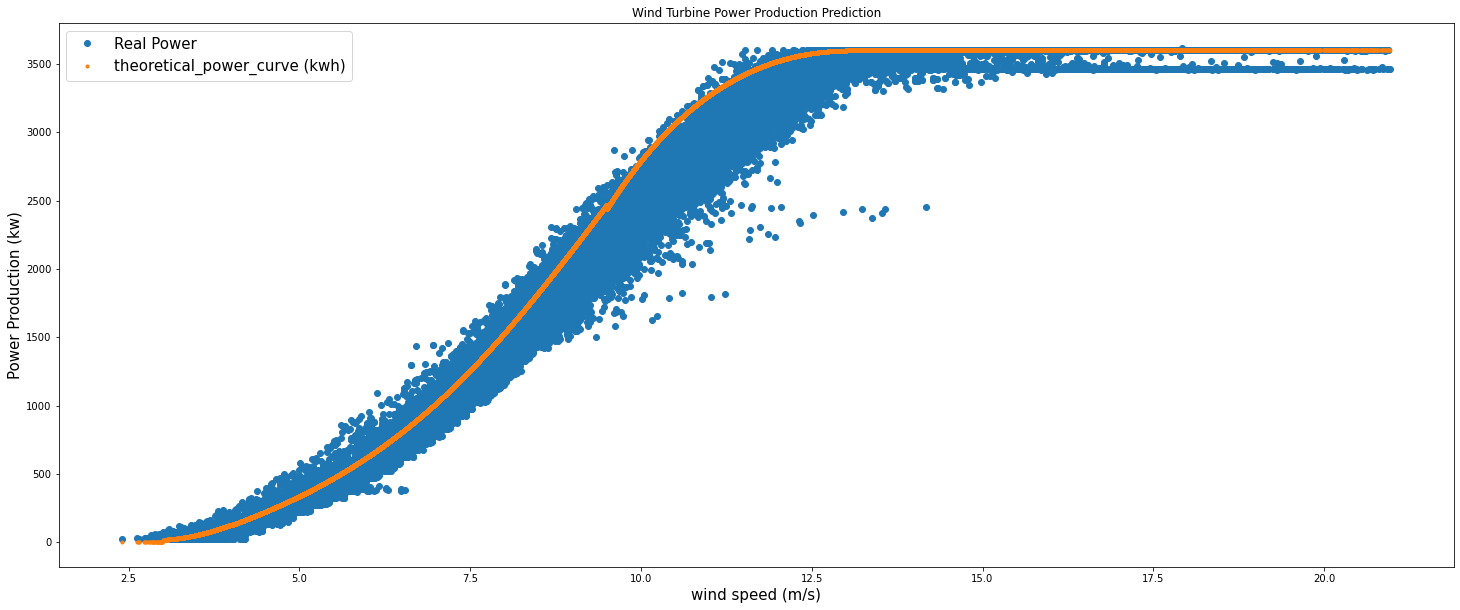

In [18]:
data = df
exp = data['LV ActivePower (kW)']
the = data['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(25,10)) 
plt.plot(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], 'o', label='Real Power')
plt.plot(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

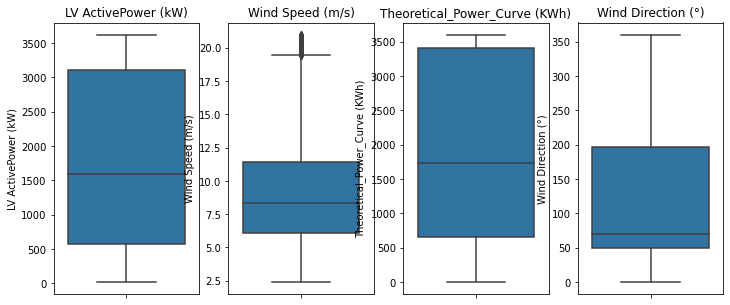

In [19]:
import matplotlib.pyplot as plt
columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
i=1
plt.figure(figsize=(12,5))
for each in columns:
    plt.subplot(1,4,i)
    sns.boxplot(data = df, y= each)
    plt.title(each)
    i += 1

In [20]:
ftrain = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']

def Definedata():
    # define dataset
    data2 = df[ftrain]
    X = data2.drop(columns=['LV ActivePower (kW)']).values
    y = data2['LV ActivePower (kW)'].values
    #lab_enc = preprocessing.LabelEncoder()
    #y = lab_enc.fit_transform(y0)
    return X, y

In [21]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    TP = df['Theoretical_Power_Curve (KWh)']
    number = len(df['Wind Speed (m/s)'])
    aa=[x for x in df['Wind Speed (m/s)']]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'o', label='Real Power')
    plt.plot(aa, y_total[:number], 'x', label='Predicted Power')
    plt.plot(aa, TP[:number], '.', label='theoretical_power_curve (kwh)')
    
    plt.xlabel('wind speed (m/s)', size=15)
    plt.ylabel('Power Production (kw)', size=15)
    plt.title('Wind Turbine Power Production Prediction')
    plt.legend(fontsize=15)
    plt.show()

		Error Table
Mean Absolute Error      :  86.2019481851275
Mean Squared  Error      :  16287.624255027184
Root Mean Squared  Error :  127.62297698701117
Accuracy on Traing set   :  0.9937399430256927
Accuracy on Testing set  :  0.9896820050171048


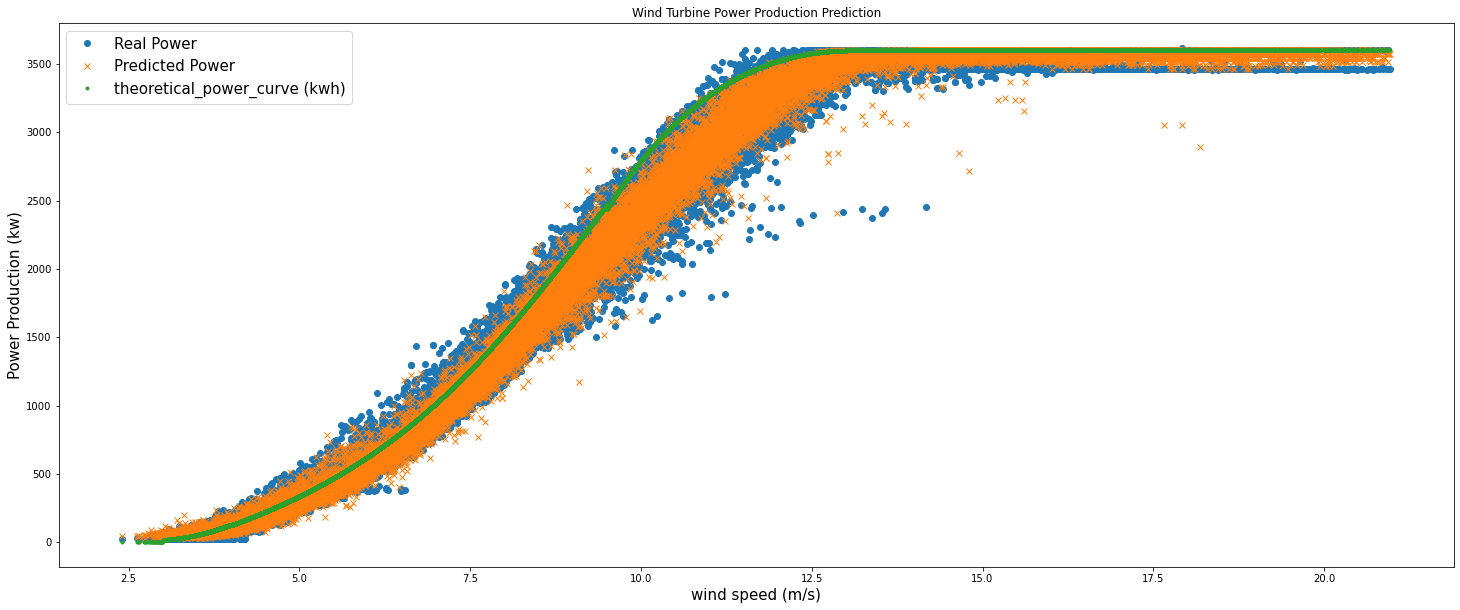

In [22]:
y_predicted, y_actual = Models(KNeighborsRegressor())
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  98.16427216524107
Mean Squared  Error      :  22676.94854180273
Root Mean Squared  Error :  150.58867335162606
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9856344524150308


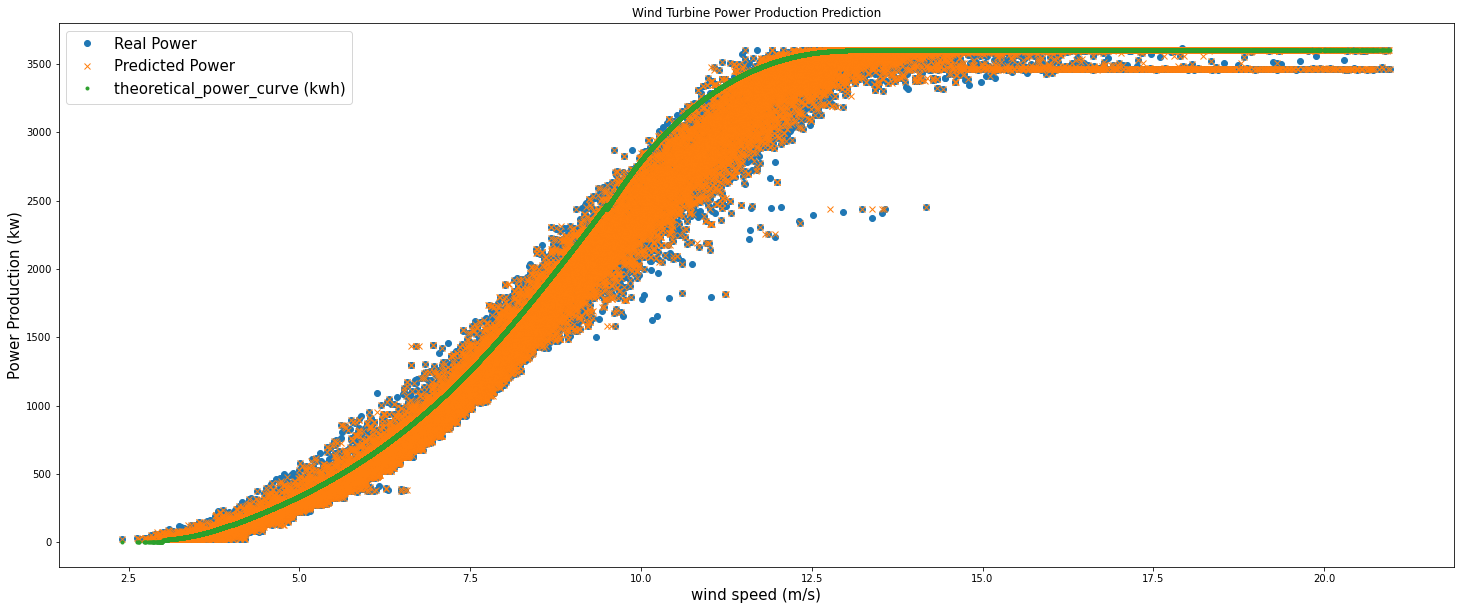

In [23]:
y_predicted, y_actual = Models(DecisionTreeRegressor())
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  80.01660470048675
Mean Squared  Error      :  14906.577885959265
Root Mean Squared  Error :  122.09249725498805
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9905568796632823


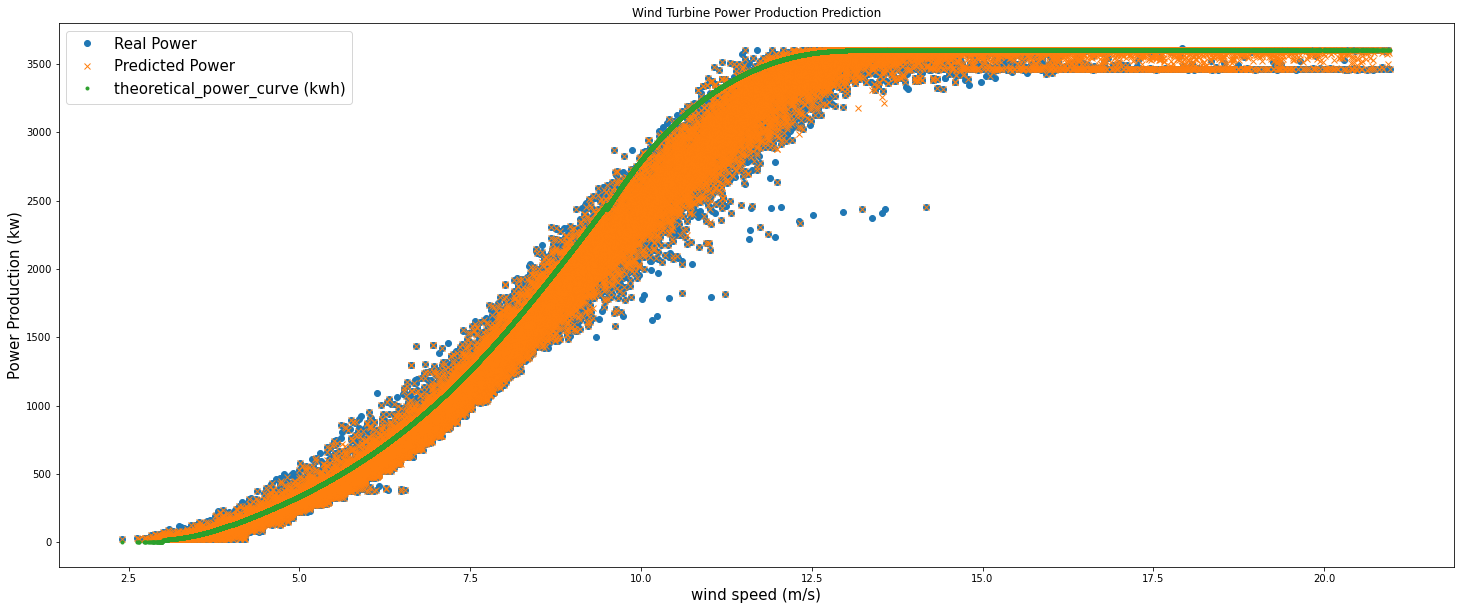

In [24]:
y_predicted, y_actual = Models(ExtraTreesRegressor())
Graph_prediction(y_actual, y_predicted)

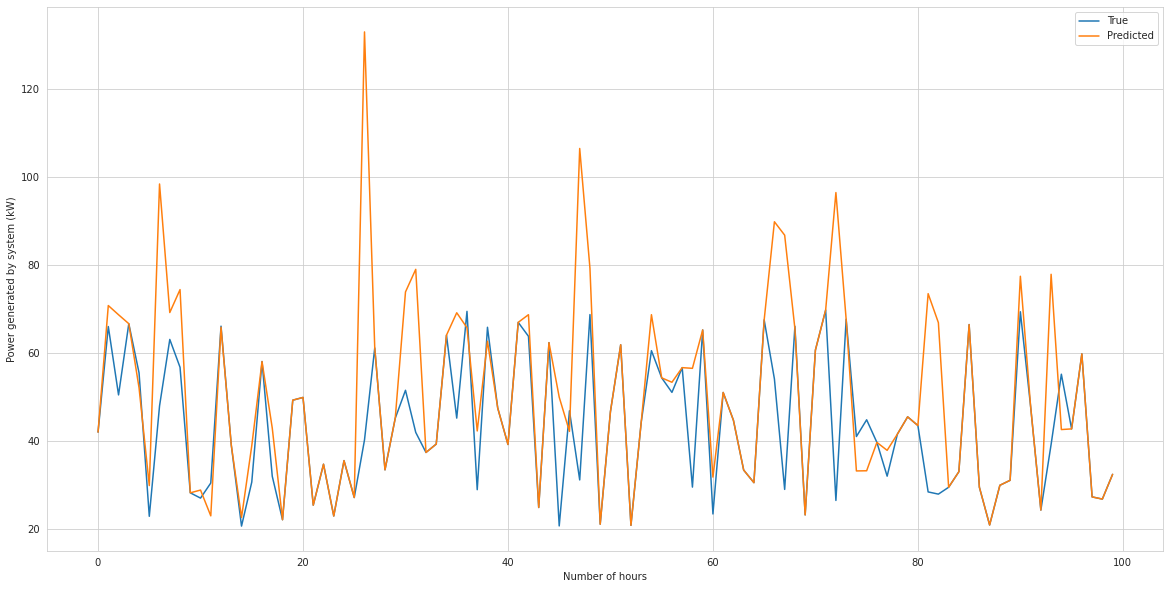

In [25]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="True")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.show()

		Error Table
Mean Absolute Error      :  76.86203833001385
Mean Squared  Error      :  13492.735357534688
Root Mean Squared  Error :  116.15823413574557
Accuracy on Traing set   :  0.9989211390555892
Accuracy on Testing set  :  0.9914525302435311


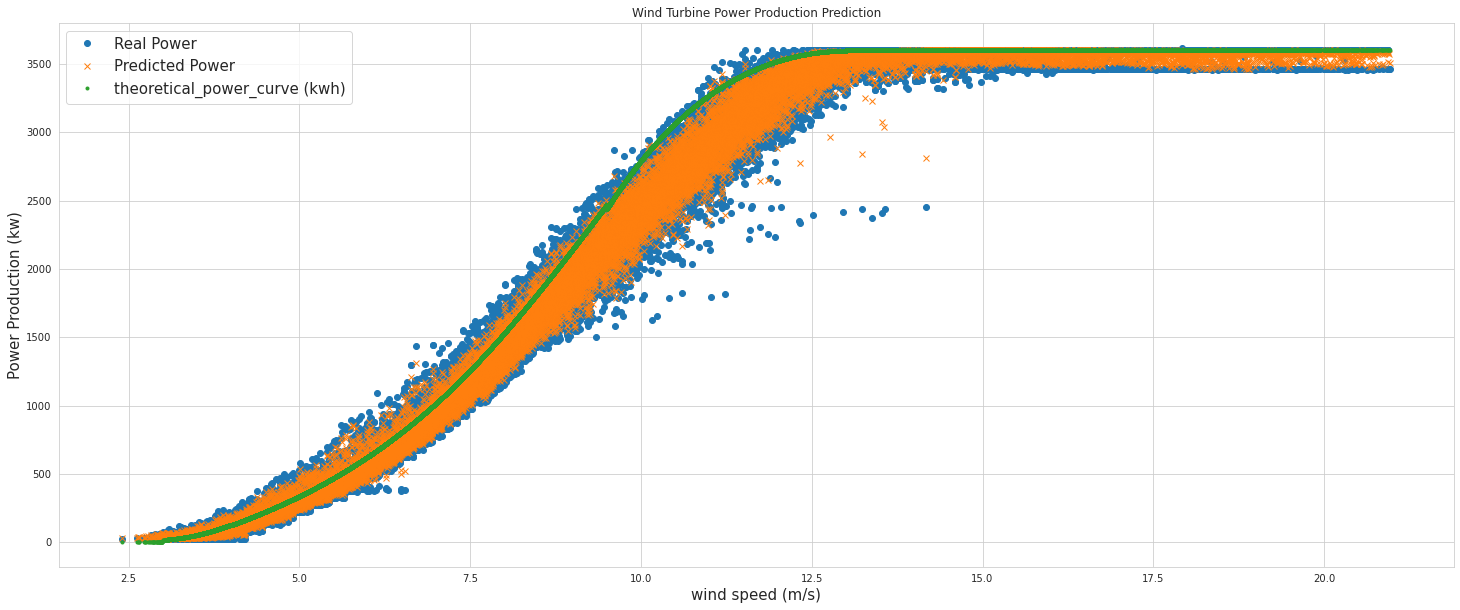

In [26]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=350,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  76.73692959592232
Mean Squared  Error      :  13169.661148179475
Root Mean Squared  Error :  114.75914407218048
Accuracy on Traing set   :  0.995230570335858
Accuracy on Testing set  :  0.9916571934908552


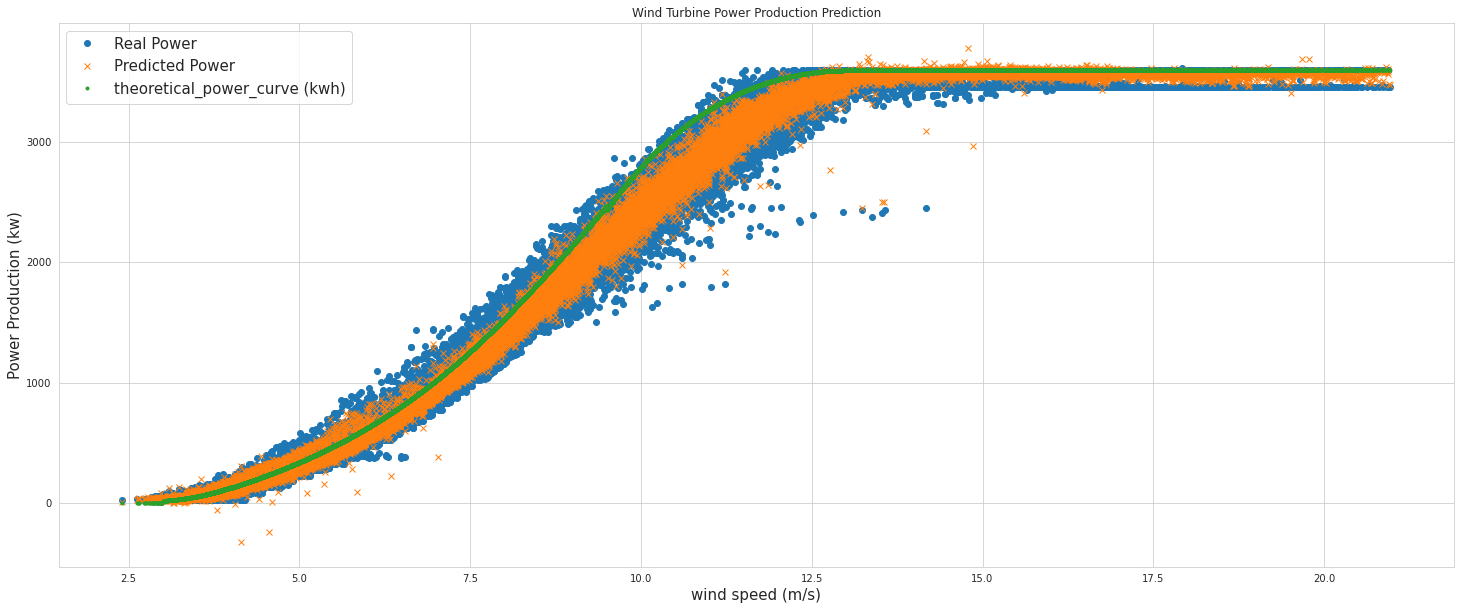

In [27]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=2000))
Graph_prediction(y_actual, y_predicted)

# Analysis of influencing factors: conclusion

By reviewing the literature, four main steps are identified to derive a power curve from a given dataset.

The first step is to filter the raw wind data to reduce the adverse effects of abnormal samples. Then, it should be determined that which power curve model will be used to characterize the nonlinear relationship between wind power and wind speed, and any other variables, such as wind direction and temperature. Third, the major goal is to get the optimal parameters in the selected power curve model. Finally, the power curve model with the optimal parameters is calculated. Based on these four steps, several factors that affect the performance of the derived power curve are identified.

+ Data filtering is an indispensable step in power curve modeling, and different data filtering methods produce different power curves. In the natural environment, due to the complexities of weather and the turbines themselves, it cannot be guaranteed that the data quality is good enough. In fact, there are large numbers of abnormal samples in our data. Consequently, it is essential to filter the raw wind data. However, it is not possible to ensure that there are no abnormal samples remaining in the filtered data, because there is no data filtering method that can identify all outliers under all complex conditions. Given the same power curve model, different data filtering methods will also result in different power curves.

+ Even when the same wind data are applied, different power curve models produce different power curves since the properties of the different power curve models are different.

+ For any given power curve model, different optimization strategies will also result in different power curves. 

From the above analysis, a better power curve can be further obtained in the following three ways:

+ Develop appropriate data filtering methods to deal with all abnormal samples;
+ Design robust power curve models, which can allow for the existence of some abnormal samples in the training phase;
+ Create a robust objective function to get suitable model parameters.

Due to the complex conditions during data acquisition and the facts that various kinds of abnormal samples and all models have errors, it is unrealistic to expect to be able to develop a method that can handle all abnormal samples. Therefore, it is necessary to pay more attention to the other two ways to enhance the accuracy of power curve modeling. However, whether designing a robust model or constructing a robust objective function to get an accurate power curve in the presence of outliers, the error characteristics of a particular task (i.e. power curve modeling) should be analyzed. Then, a specific model based on the observed error characteristics can be developed, which may be more suitable for power curve modeling.